In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [82]:
info_csv = pd.read_csv('../datasets/labeled.csv')

In [83]:
y = info_csv['malicious']
X = info_csv.drop('malicious', axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30)

In [85]:
knn = KNeighborsClassifier(n_neighbors=1)

In [86]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [87]:
pred = knn.predict(X_test)

In [88]:
print(confusion_matrix(y_test,pred))

[[ 250   21   41]
 [  10 3967   68]
 [  18   52  904]]


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       312
           1       0.98      0.98      0.98      4045
           2       0.89      0.93      0.91       974

    accuracy                           0.96      5331
   macro avg       0.92      0.90      0.91      5331
weighted avg       0.96      0.96      0.96      5331



In [90]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

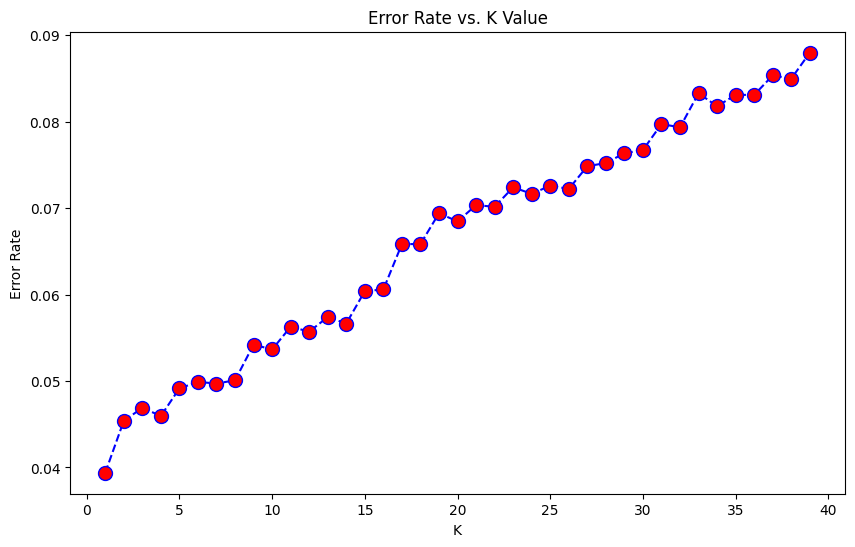

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [92]:
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K={}'.format(i))
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')

WITH K=1


[[ 250   21   41]
 [  10 3967   68]
 [  18   52  904]]


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       312
           1       0.98      0.98      0.98      4045
           2       0.89      0.93      0.91       974

    accuracy                           0.96      5331
   macro avg       0.92      0.90      0.91      5331
weighted avg       0.96      0.96      0.96      5331



WITH K=2


[[ 261   19   32]
 [  22 3992   31]
 [  37  101  836]]


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       312
           1       0.97      0.99      0.98      4045
           2       0.93      0.86      0.89       974

    accuracy                           0.95      5331
   macro avg       0.91      0.89      0.90      5331
weighted avg       0.95      0.95      0.95      5331



WITH K=3


[[ 238   34   40]
 [  15 3957   73]
 [  16   72  886]]


              precision    rec

In [93]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [94]:
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[ 229   39   44]
 [   7 3966   72]
 [   4  136  834]]


              precision    recall  f1-score   support

           0       0.95      0.73      0.83       312
           1       0.96      0.98      0.97      4045
           2       0.88      0.86      0.87       974

    accuracy                           0.94      5331
   macro avg       0.93      0.86      0.89      5331
weighted avg       0.94      0.94      0.94      5331

